Machine Learning for Data Science

Question: Implement Support Vector Machine Algorithm for Multi-class classification (both one versus all, one versus one) using iris.csv dataset with different kernels. The output should include Accuracy, Error rate, Precision and recall rate along with the confusion matrix. 

# Import libraries

In [ ]:
import numpy as np 
import pandas as pd 
import os
import gc
import sklearn

#For 1vs1 & 1vsRest Classifiers
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier   
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Import Dataset

In [177]:
data = pd.read_csv("C:/Users/veniniyan/Downloads/Iris.csv", header='infer')

# Exploratory Data Analysis

In [178]:
print("Total Row and columns ", data.shape)

Total Row and columns  (150, 5)


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [180]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [181]:
#Summary
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [182]:
#Display Data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

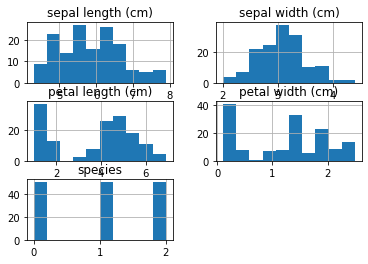

In [183]:
data.hist()

# Features and Target

In [184]:
X=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y=data['species']

In [185]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [186]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [187]:
y.unique()

array([0, 1, 2], dtype=int64)

# Data Spliting

In [188]:
#Split Parameters
test_size = 0.3

#Dataset Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=121) 

# Feature Scaling

In [189]:
#Reset Index
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# SVM Algorithm for One versus One

In [190]:
#SVC Model
model = SVC(gamma='scale',random_state=121)

#Define 1-vs-1 Classifier
ovo = OneVsOneClassifier(model)

#fit model to training data
ovo.fit(X_train, y_train)

#Predications
ovo_pred = ovo.predict(X_test)

#Adding Predictions to Test Dataset
ovo_df = X_test.copy()
ovo_df.insert(4,"Actual",y_test, True)
ovo_df.insert(5,"Predicted",ovo_pred, True)

In [191]:
print("The Accuracy of above model is ",metrics.accuracy_score(y_test,ovo_pred)*100,"%")

The Accuracy of above model is  95.55555555555556 %


Confusion Matrix

In [192]:
matrix=metrics.confusion_matrix(y_test,ovo_pred)
matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 13]], dtype=int64)

Precision, Recall, Error rate

In [193]:
print(classification_report (y_test,ovo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [194]:
#Inspect Test Dataset
ovo_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual,Predicted
0,7.0,3.2,4.7,1.4,1,1
1,6.2,3.4,5.4,2.3,2,2
2,6.0,3.4,4.5,1.6,1,1
3,4.6,3.4,1.4,0.3,0,0
4,5.2,4.1,1.5,0.1,0,0


# With different kernels

rbf Kernal

In [195]:
model2=SVC(gamma='scale',kernel="rbf")
ovo=OneVsOneClassifier(model2)
ovo.fit(X_train,y_train)
y_pred=ovo.predict(X_test)
print("Accuracy using rbf kernel is :",round(accuracy_score(y_test,y_pred) * 100,4))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Mean Absoulte Error is ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is ",mean_squared_error(y_test,y_pred))

Accuracy using rbf kernel is : 95.5556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 16  0]
 [ 0  2 13]]
Mean Absoulte Error is  0.044444444444444446
Mean Squared Error is  0.044444444444444446


poly kernal

In [196]:
model2=SVC(gamma='scale',kernel="poly")
ovo=OneVsOneClassifier(model2)
ovo.fit(X_train,y_train)
y_pred=ovo.predict(X_test)
print("Accuracy using rbf kernel is :",round(accuracy_score(y_test,y_pred) * 100,4))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Mean Absoulte Error is ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is ",mean_squared_error(y_test,y_pred))

Accuracy using rbf kernel is : 95.5556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]
Mean Absoulte Error is  0.044444444444444446
Mean Squared Error is  0.044444444444444446


# SVM Algorithm for One vs Rest

In [197]:
#Define 1-vs-Rest Classifier
ovr = OneVsRestClassifier(model)

#fit model to training data
ovr.fit(X_train, y_train)

#Predications
ovr_pred = ovr.predict(X_test)

#Adding Predictions to Test Dataset
ovr_df = X_test.copy()
ovr_df.insert(4,"Actual",y_test, True)
ovr_df.insert(5,"Predicted",ovr_pred, True)

In [198]:
print("The Accuracy of above model is ",metrics.accuracy_score(y_test,ovr_pred)*100,"%")

The Accuracy of above model is  93.33333333333333 %


Confusion Matrix

In [199]:
matrix=metrics.confusion_matrix(y_test,ovo_pred)
matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 13]], dtype=int64)

Precision, Recall, Error rate

In [200]:
print(classification_report (y_test,ovr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [201]:
#Inspect
ovr_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual,Predicted
0,7.0,3.2,4.7,1.4,1,1
1,6.2,3.4,5.4,2.3,2,2
2,6.0,3.4,4.5,1.6,1,1
3,4.6,3.4,1.4,0.3,0,0
4,5.2,4.1,1.5,0.1,0,0


# With different kernels

linear kernal

In [202]:
model2=SVC(gamma='scale',kernel="linear")
ovo=OneVsRestClassifier(model2)
ovo.fit(X_train,y_train)
y_pred=ovo.predict(X_test)
print("Accuracy using rbf kernel is :",round(accuracy_score(y_test,y_pred) * 100,4))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Mean Absoulte Error is ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is ",mean_squared_error(y_test,y_pred))

Accuracy using rbf kernel is : 91.1111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88        16
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[14  0  0]
 [ 0 14  2]
 [ 0  2 13]]
Mean Absoulte Error is  0.08888888888888889
Mean Squared Error is  0.08888888888888889


rbf kernel

In [205]:
model2=SVC(gamma='scale',kernel="sigmoid")
ovo=OneVsRestClassifier(model2)
ovo.fit(X_train,y_train)
y_pred=ovo.predict(X_test)
print("Accuracy using rbf kernel is :",round(accuracy_score(y_test,y_pred) * 100,4))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Mean Absoulte Error is ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is ",mean_squared_error(y_test,y_pred))

Accuracy using rbf kernel is : 20.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.53      0.56      0.55        16
           2       0.00      0.00      0.00        15

    accuracy                           0.20        45
   macro avg       0.18      0.19      0.18        45
weighted avg       0.19      0.20      0.19        45

[[ 0  7  7]
 [ 7  9  0]
 [14  1  0]]
Mean Absoulte Error is  1.2666666666666666
Mean Squared Error is  2.2
